In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### EDA

In [61]:
df = pd.read_csv('./../eda/data/merged_data.csv')

In [62]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,...,27142.451857,26395.847330,19736.054484,9543.760350,223.790644,15057.239225,17365.139937,13473.701138,10014.440951,4391.736785
std,18.764856,624.817403,648.030094,2.385172,21.887316,2.001541,19.292389,71.256850,4.679056e+10,1.482439e+06,...,39941.977062,36960.317249,24219.922727,9600.950081,399.065330,22371.870231,24534.250632,16564.421275,11715.352615,4832.596737
min,20191.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135000e+03,2.000000e+00,...,1169.000000,1978.000000,2704.000000,2245.000000,0.000000,635.000000,1180.000000,1674.000000,1663.000000,257.000000
25%,20203.000000,94.000000,105.000000,1.300000,2.000000,1.200000,2.000000,0.000000,1.197476e+09,1.463000e+04,...,5590.000000,5799.000000,5397.000000,3928.000000,0.000000,3138.000000,3795.000000,4042.000000,3856.000000,1695.000000
50%,20221.000000,161.000000,188.000000,2.600000,5.000000,2.300000,4.000000,4.000000,4.114511e+09,7.159500e+04,...,9123.000000,10094.000000,10122.000000,5924.000000,39.000000,5068.000000,6673.000000,6807.000000,5695.000000,2678.000000
75%,20234.000000,313.000000,357.000000,4.200000,12.000000,3.600000,10.000000,27.000000,1.251953e+10,3.641125e+05,...,24849.000000,24451.000000,18373.000000,10207.000000,209.000000,21296.000000,21114.000000,14062.000000,8866.000000,4775.000000
max,20252.000000,17827.000000,17845.000000,43.600000,773.000000,33.300000,554.000000,688.000000,1.399137e+12,2.716973e+07,...,204697.000000,188865.000000,116356.000000,51339.000000,1679.000000,114671.000000,124729.000000,86333.000000,63848.000000,26816.000000


In [63]:
df = df.drop(['폐업_점포_수', '폐업_영업_개월_평균', '서울시_폐업_영업_개월_평균'], axis=1)

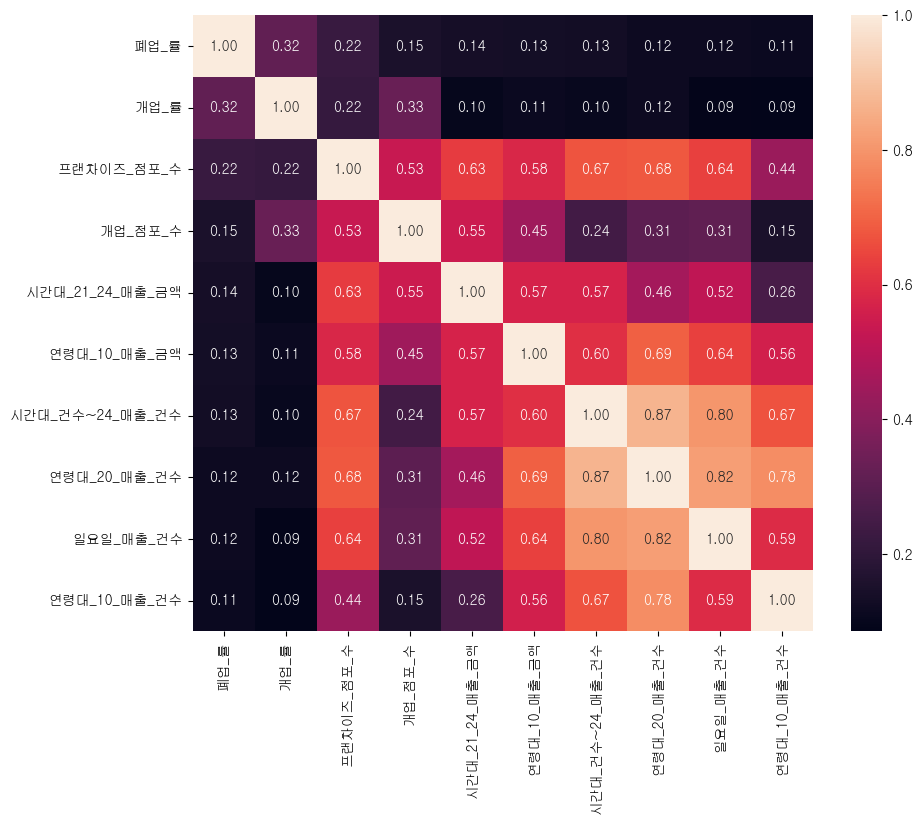

In [64]:
corr = df.corr(numeric_only=True)

# 폐업률과의 상관관계 절댓값 기준으로 정렬
target_corr = corr['폐업_률'].dropna()
top_features = target_corr.abs().sort_values(ascending=False).head(10).index

corr_subset = corr.loc[top_features, top_features]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f")
plt.show()

In [65]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

cols = ['자치구_코드_명', '서비스_업종_코드_명', '상권_변화_지표']

for col in cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    print(encoder.classes_)

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
['PC방' '가구' '가방' '가전제품' '가전제품수리' '고시원' '골프연습장' '네일숍' '노래방' '당구장' '문구'
 '미곡판매' '미용실' '반찬가게' '부동산중개업' '분식전문점' '서적' '섬유제품' '세탁소' '수산물판매' '슈퍼마켓'
 '스포츠 강습' '스포츠클럽' '시계및귀금속' '신발' '안경' '애완동물' '양식음식점' '여관' '예술학원' '완구'
 '외국어학원' '운동/경기용품' '육류판매' '의료기기' '의약품' '인테리어' '일반교습학원' '일반의류' '일반의원'
 '일식음식점' '자동차미용' '자동차수리' '자전거 및 기타운송장비' '전자상거래업' '제과점' '조명용품' '중식음식점'
 '철물점' '청과상' '치과의원' '치킨전문점' '커피-음료' '컴퓨터및주변장치판매' '패스트푸드점' '편의점' '피부관리실'
 '한식음식점' '한의원' '핸드폰' '호프-간이주점' '화장품' '화초']
['HH' 'HL' 'LH' 'LL']


In [66]:
# 건당 매출액 (단가)
df['건당_매출액'] = df['당월_매출_금액'] / (df['당월_매출_건수'] + 1e-6)

# 주중 매출액 합산
df['주중_매출_금액'] = df['월요일_매출_금액'] + df['화요일_매출_금액'] + df['수요일_매출_금액'] + df['목요일_매출_금액'] + df['금요일_매출_금액']

# 주말 매출액 합산
df['주말_매출_금액'] = df['토요일_매출_금액'] + df['일요일_매출_금액']

# 비율 계산
df['주중_매출_비율'] = df['주중_매출_금액'] / (df['당월_매출_금액'] + 1e-6)
df['주말_매출_비율'] = df['주말_매출_금액'] / (df['당월_매출_금액'] + 1e-6)

# 저녁 시간대 매출 비율
df['저녁시간_매출_비율'] = df['시간대_17_21_매출_금액'] / (df['당월_매출_금액'] + 1e-6)

# 여성, 남성 매출 비율
df['여성_매출_비율'] = df['여성_매출_금액'] / (df['당월_매출_금액'] + 1e-6)
df['남성_매출_비율'] = df['남성_매출_금액'] / (df['당월_매출_금액'] + 1e-6)

# 유동인구 대비 상주인구 비율
df['유동인구_대비_상주인구_비율'] = df['총_상주인구_수'] / (df['총_유동인구_수'] + 1e-6)

df['연도'] = df['기준_년분기_코드'].astype(str).str[:4].astype(int)
df['분기'] = df['기준_년분기_코드'].astype(str).str[4:].astype(int)

In [67]:
df = df.sort_values(by=['자치구_코드_명', '서비스_업종_코드_명', '연도', '분기'])

df['전년_당월_매출액'] = df.groupby(['자치구_코드_명', '서비스_업종_코드_명'])['당월_매출_금액'].shift(4)
df['전년_유사_업종_점포_수'] = df.groupby(['자치구_코드_명', '서비스_업종_코드_명'])['유사_업종_점포_수'].shift(4)

# 전년 데이터를 빼서 증감 계산
df['당월매출증감'] = df['당월_매출_금액'] - df['전년_당월_매출액']
df['유사업종점포수증감'] = df['유사_업종_점포_수'] - df['전년_유사_업종_점포_수']

# 첫 해 데이터는 평균값으로 대체
df['당월매출증감'].fillna(df['당월매출증감'].mean(), inplace=True)
df['유사업종점포수증감'].fillna(df['유사업종점포수증감'].mean(), inplace=True)
df['전년_당월_매출액'].fillna(df['전년_당월_매출액'].mean(), inplace=True)
df['전년_유사_업종_점포_수'].fillna(df['전년_유사_업종_점포_수'].mean(), inplace=True)

print(df[['자치구_코드_명', '서비스_업종_코드_명', '연도', '분기', '당월매출증감', '유사업종점포수증감']].head(10))

       자치구_코드_명  서비스_업종_코드_명    연도  분기        당월매출증감  유사업종점포수증감
0             0            0  2019   1  6.324018e+08   5.965263
1535          0            0  2019   2  6.324018e+08   5.965263
3072          0            0  2019   3  6.324018e+08   5.965263
4611          0            0  2019   4  6.324018e+08   5.965263
6150          0            0  2020   1  1.760929e+09  -6.000000
7687          0            0  2020   2  3.535647e+08  -3.000000
9227          0            0  2020   3 -2.129626e+09  -8.000000
10766         0            0  2020   4 -1.330823e+09 -22.000000
12305         0            0  2021   1  4.835687e+08 -17.000000
13845         0            0  2021   2  2.458889e+09 -18.000000


C:\Users\tndl3\AppData\Local\Temp\ipykernel_11516\3844697797.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['당월매출증감'].fillna(df['당월매출증감'].mean(), inplace=True)
C:\Users\tndl3\AppData\Local\Temp\ipykernel_11516\3844697797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [68]:
df = df.drop([
    # 유동인구
    '남성_유동인구_수', '여성_유동인구_수',
    '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수',
    '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
    '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
    '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수',
    '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수',
    '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수',

    # 직장인구
    '연령대_10_직장인구_수', '연령대_20_직장인구_수', '연령대_30_직장인구_수',
    '연령대_40_직장인구_수', '연령대_50_직장인구_수', '연령대_60_이상_직장인구_수',
    '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수',
    '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수',
    '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수',
    '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수',

    # 상주인구
    '남성_상주인구_수', '여성_상주인구_수',
    '연령대_10_미만_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
    '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수',
    '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수',
    '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수',
    '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수',
    '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수',

    # 지출 관련
    '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
    '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액',
], axis=1)


### 분류 모델 학습

---
### 폐업률 기준 = 50%

In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 폐업률 50%을 기준으로 등급 나누기
df['폐업률_등급'] = pd.qcut(df['폐업_률'], q=[0, 0.5, 1.0], labels=[0, 1])

X = df.drop(['폐업_률', '폐업률_등급'], axis=1) 
y_class = df['폐업률_등급']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# XGBoost 이진 분류 학습
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['안정', '위험']))

              precision    recall  f1-score   support

          안정       0.75      0.80      0.77      4111
          위험       0.77      0.71      0.74      3884

    accuracy                           0.76      7995
   macro avg       0.76      0.76      0.76      7995
weighted avg       0.76      0.76      0.76      7995



In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 테스트해볼 파라미터 후보군 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# GridSearchCV 객체 생성
grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3,
                           scoring='accuracy', verbose=2)

# 학습 시작
grid.fit(X_train, y_train)

print('최적의 파라미터: ', grid.best_params_)
print('최적화된 모델 객체: ', grid.best_estimator_)
print('최적화된 점수: ', grid.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.1s
[CV] END 

In [80]:
# 최적의 모델로 예측
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['안정', '위험']))

0.8308317698561601
0.7589743589743589
              precision    recall  f1-score   support

          안정       0.75      0.80      0.77      4111
          위험       0.77      0.71      0.74      3884

    accuracy                           0.76      7995
   macro avg       0.76      0.76      0.76      7995
weighted avg       0.76      0.76      0.76      7995



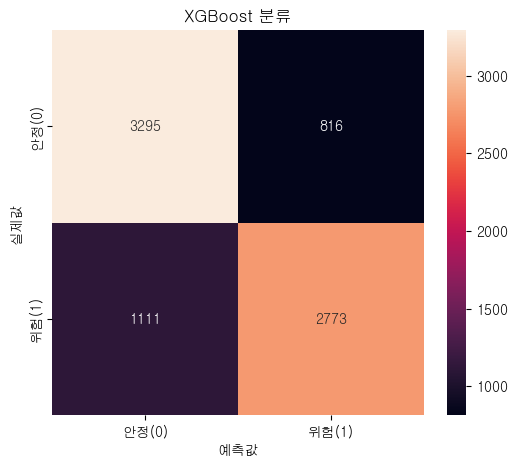

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['안정(0)', '위험(1)'],
            yticklabels=['안정(0)', '위험(1)'])
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('XGBoost 분류')
plt.show()

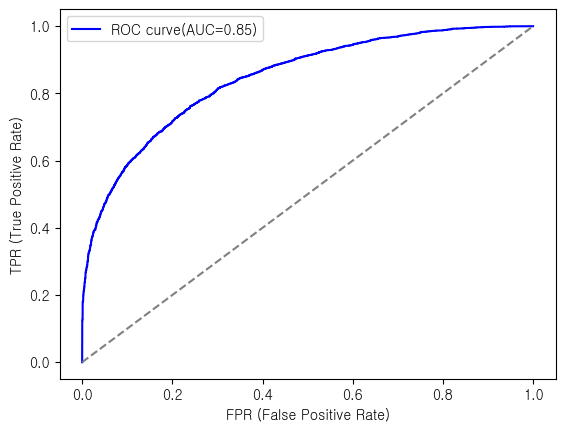

In [82]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

---
### 폐업률 기준 = 평균값

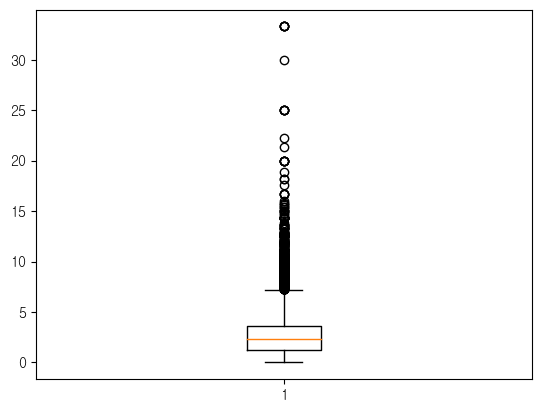

In [74]:
plt.boxplot(df['폐업_률'])
plt.show()

In [75]:
df['폐업_률'].mean()

2.5898286429018134

In [83]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 폐업률 2.6을 기준으로 등급 나누기
df['폐업률_등급'] = (df['폐업_률'] > 2.6).astype(int)

X = df.drop(['폐업_률', '폐업률_등급'], axis=1)
y_class = df['폐업률_등급']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# XGBoost 이진 분류 학습
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['안정','위험']))

              precision    recall  f1-score   support

          안정       0.78      0.85      0.81      4634
          위험       0.76      0.67      0.71      3361

    accuracy                           0.77      7995
   macro avg       0.77      0.76      0.76      7995
weighted avg       0.77      0.77      0.77      7995



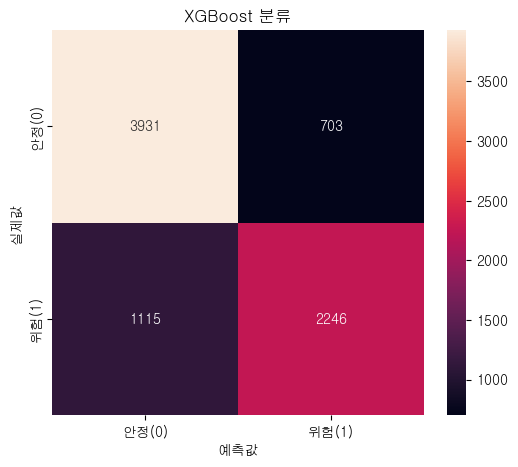

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['안정(0)', '위험(1)'],
            yticklabels=['안정(0)', '위험(1)'])
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('XGBoost 분류')
plt.show()

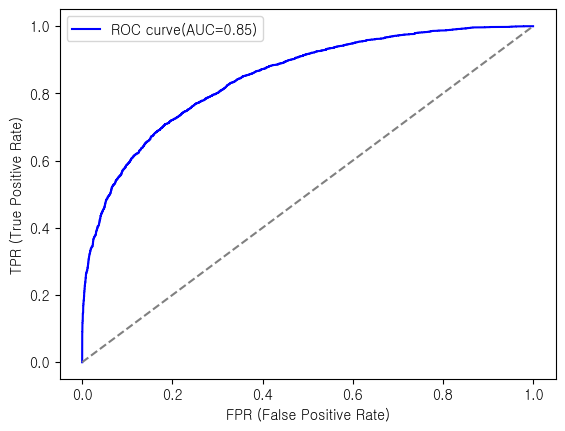

In [85]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()